In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp

In [87]:
x = ar([35, 50, 80, 120, 320, 500])
y = ar([25.385, 29.499, 32.381, 33.746, 32.048, 31.813])

In [92]:
import numpy as np

def gaussian(x, A, B, C):
    return A * np.exp(-np.square(x - B) / (2 * np.square(C)))

# Initial parameter guess, if poor, fitting may not converge
initial_guess = [39.62, 293, 312.416]

# Perform the fitting
popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

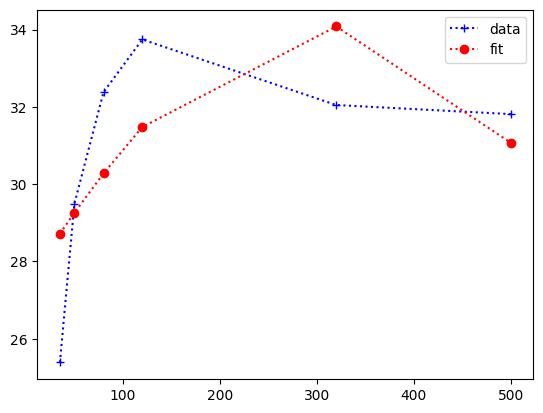

In [93]:
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, gaussian(x, *popt), 'ro:', label='fit')
plt.legend()
plt.show()

/tmp/ipykernel_24989/2632983143.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("tab10", 10)


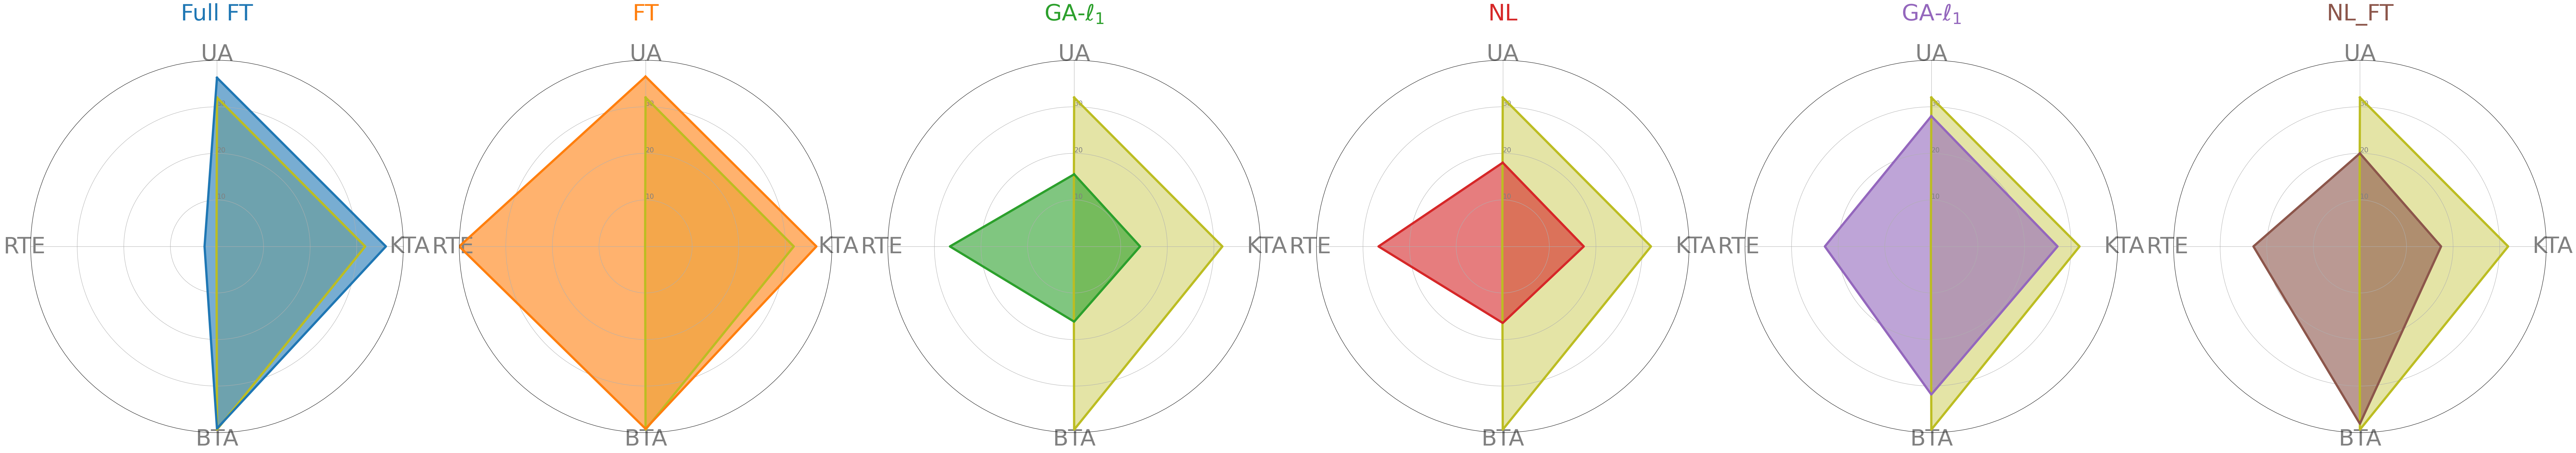

In [67]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Full FT','FT','GA-$\ell_1$','NL', 'GA-$\ell_1$', 'NL_FT'],
'UA': [36.25, 36.5, 15.5, 18, 28, 20],
'KTA': [36.26, 36.67, 14.15, 17.39, 27.09, 17.42],
'BTA': [39.12, 39.18, 16.16, 16.44, 31.81, 38.10],
'RTE': [1/300*800, 1/20*800, 1/30*800, 1/30*800, 1/35*800, 1/35*800],
})
df1 = pd.DataFrame({
    'group': ['retrain'],
    'UA': [32],
    'KTA': [31.82],
    'BTA': [39.36],
    'RTE': [0.1],
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1, 6, row+1, polar=True, )
    plt.subplots_adjust(wspace=0.15, hspace=0)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=50)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=15)
    plt.ylim(0,40)

    # Ind1
    values=df1.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=my_palette(8), linewidth=5, linestyle='solid')
    ax.fill(angles, values, color=my_palette(8), alpha=0.4)
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=5, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.6)

    # Add a title
    plt.title(title, size=50, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(my_dpi, my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("tab10", 10)
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['group'][row], color=my_palette(row))